In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [4]:
df = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
df.shape

(10127, 23)

## EDA

In [8]:
### MISSING VALUES

df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

### Hence there are no missing values for each feature

In [9]:
### NUMERICAL VARIABLES

numerical_values = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical variable : ' , len(numerical_values))

df[numerical_values].head()



Number of numerical variable :  17


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### DISTRIBUTING NUMERICAL FEATURES INTO DISCRETE AND CONTINOUS VARIABLES

In [10]:
### DISCRETE VARIABLES

discrete_feature = [feature for feature in numerical_values if len(df[feature].unique()) < 100 and feature not in ['CLIENTNUM'] ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 6


In [11]:
discrete_feature

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

In [12]:
continuous_feature=[feature for feature in numerical_values if feature not in discrete_feature+['CLIENTNUM']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 10


In [14]:
import matplotlib.pyplot as plt

In [16]:
# We don't need the unique ids'
df.drop('CLIENTNUM', axis=1, inplace=True)

df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], 
          inplace=True, axis=1)
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
          inplace=True, axis=1)

display(df.shape)

(10127, 20)

In [17]:
# Checking features and target columns
display(df.columns)
# Checking dtypes
display(df.info())
# Checking numeric values stats
display(df.describe())

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

None

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [18]:
### CATEGORICAL FEATURES

categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']


Attrition_Flag (1: Existing Customer, 0: Attrited Customer): The Customer leave or not

Gender (1: Male, 0: Female)

Education_Level (Graduate , High School, Unknown, Uneducated, College, Post-Graduate, Doctorate)

Marital_Status (Married, Single, Unknown, Divorced)

Income_Category (Less than 40K, 40K - 60K, 80K - 120K, 60K - 80K, Unknown, 120K +) in dollar

Card_Category (Blue, Silver, Gold, Platinum)


In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
plt.style.use('ggplot')


In [20]:
def CountPlot(categorical_feature):
    fig,axis = plt.subplots(len(categorical_features) // 3 , 3 , figsize=(20,12))
    
    index = 0
    
    for i in range(len(categorical_feature) // 3):
        for j in range(3):
            ax = sns.countplot(categorical_feature[index] , data = df , ax = axis[i][j])
            
            if categorical_feature[index] in ['Education_Level' , 'Income_Category'] :
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                    
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(df)*100),
                        ha="center") 
            index += 1
    

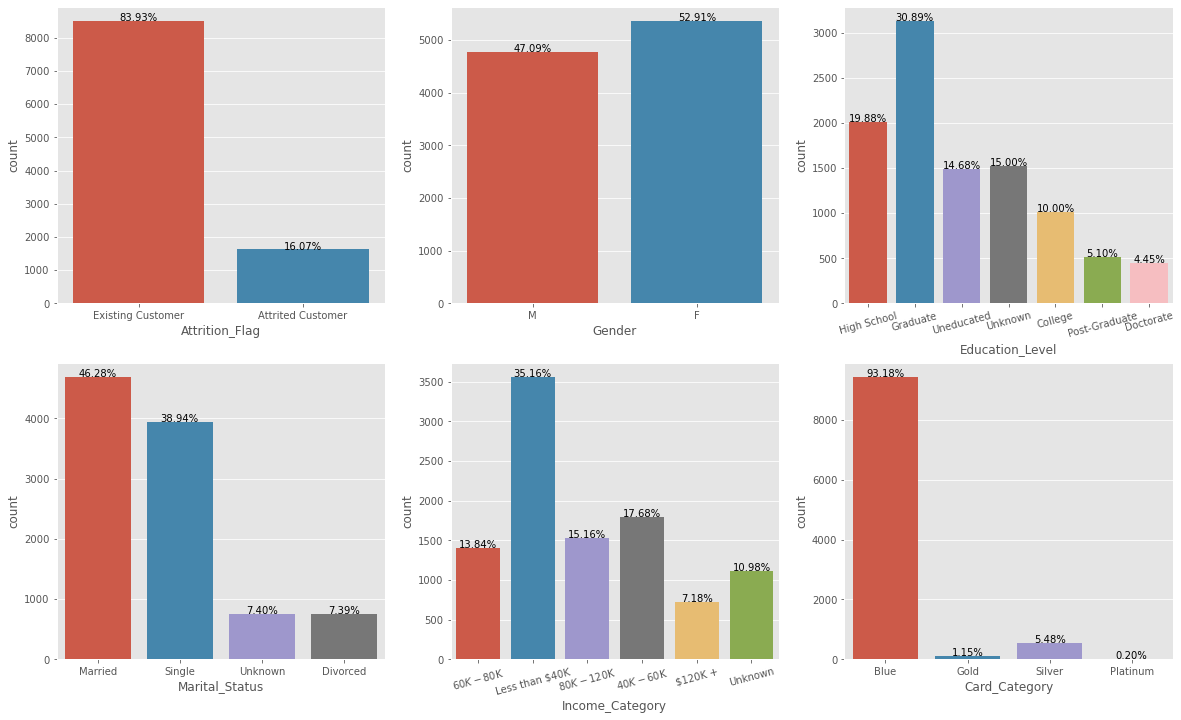

In [21]:
CountPlot(categorical_features)

### OBSERVATIONS

1. Most of the people uses Blue Card
2. As education level increases , less people tend to use cards.


In [22]:
### NUMERICAL VARIABLES

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical variable : ' , len(numerical_features))

df[numerical_features].head()


Number of numerical variable :  14


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [23]:
numerical_features

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Customer_Age: Customer's Age in Years

Dependent_count: Number of dependents

Months_on_book: Period of relationship with bank

Total_Relationship_Count: Total no. of products held by the customer

Months_Inactive_12_mon: No. of months inactive in the last 12 months

Contacts_Count_12_mon: No. of Contacts in the last 12 months

Credit_Limit: Credit Limit on the Credit Card

Total_Revolving_Bal: Total Revolving Balance on the Credit Card

Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt: Total Transaction Amount (Last 12 months)

Total_Trans_Ct: Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio: Average Card Utilization Ratio

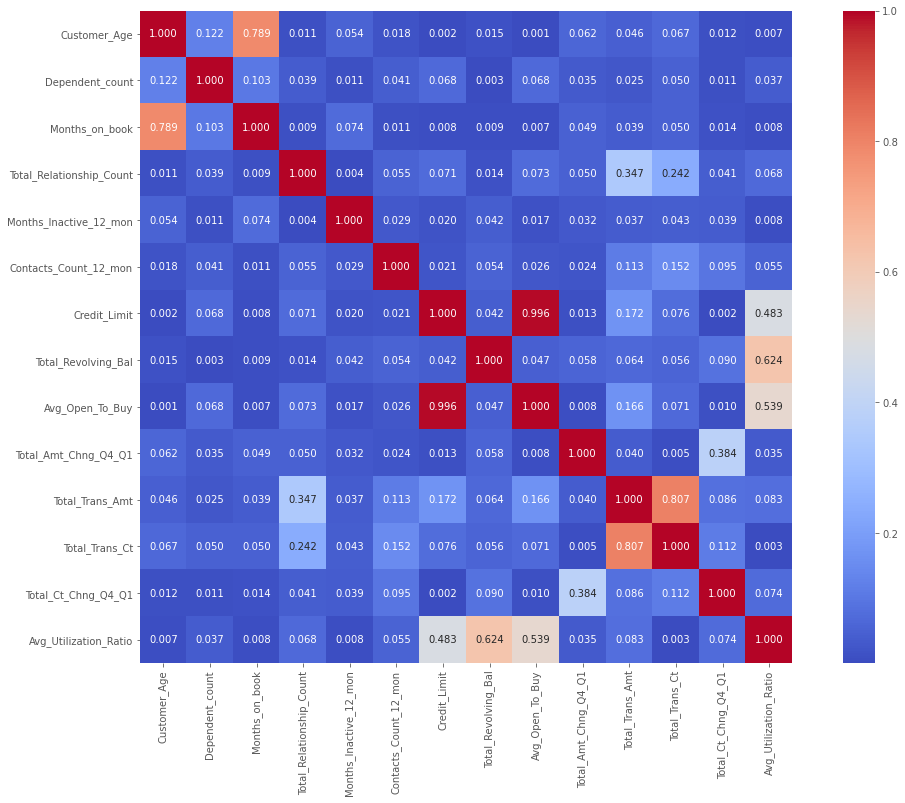

In [24]:
corr_data = df.loc[:,numerical_features].corr()

plt.figure(figsize=(18,12))
sns.heatmap(corr_data.abs() , annot = True , fmt = '.3f' , cmap= 'coolwarm' , square = True )
plt.show()

## 

In [27]:
import plotly.express as ex
ex.pie(df,names='Attrition_Flag',title='Proportion of churn vs not churn customers')

## Feature Engineering

In [38]:
### Converting object,category values to numeric values

### To Binary

updated_df = pd.DataFrame()

def to_binary():
    updated_df['Churn'] = df.Attrition_Flag.map({'Existing Customer' : 1 , 'Attrited Customer' : 0})
    
    updated_df['Gender'] = df.Gender.map({'M':1, 'F':0})

In [29]:
### String values to integer

def stringtoint():
    income_data = df['Income_Category'].replace({'Unknown': 0 , 'Less than $40K':1, '$40K - $60K':2, 
                                                      '$80K - $120K':3, '$60K - $80K':4, '$120K +':5})
    
    education_data = df['Education_Level'].replace({'Unknown': 0, 'High School':1, 'Graduate':2, 'Uneducated':3,
                                                         'College':4,'Post-Graduate':5,'Doctorate':6})
    
    updated_df['Income_Category'] = income_data
    updated_df['Education_Level'] = education_data

In [30]:
### Dummies

def encode():
    global updated_df
    card_dummies = pd.get_dummies(df['Card_Category'],prefix='Card')
    marital_status = pd.get_dummies(df['Marital_Status'] , prefix = 'Marital')
    updated_df = pd.concat([updated_df,card_dummies,marital_status],axis=1)

In [33]:
def concat_with_numeric():
    global updated_df
    updated_df = pd.concat([updated_df , df.loc[:,numerical_features]] , axis=1)

In [39]:
to_binary()
stringtoint()
encode()
concat_with_numeric()

In [40]:
print('Old data Shape: ' , df.shape)
print('Updated data Shape: ',updated_df.shape)

Old data Shape:  (10127, 20)
Updated data Shape:  (10127, 26)


In [41]:
updated_df.columns

Index(['Churn', 'Gender', 'Income_Category', 'Education_Level', 'Card_Blue',
       'Card_Gold', 'Card_Platinum', 'Card_Silver', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Unknown', 'Customer_Age',
       'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [42]:
updated_df.head()

,Churn,Gender,Income_Category,Education_Level,Card_Blue,Card_Gold,Card_Platinum,Card_Silver,Marital_Divorced,Marital_Married,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,4,1,1,0,0,0,0,1,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,0,1,2,1,0,0,0,0,0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,1,3,2,1,0,0,0,0,1,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,0,1,1,1,0,0,0,0,0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,1,4,3,1,0,0,0,0,1,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [43]:
updated_df.describe()

,Churn,Gender,Income_Category,Education_Level,Card_Blue,Card_Gold,Card_Platinum,Card_Silver,Marital_Divorced,Marital_Married,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,0.470919,2.072578,2.179125,0.931767,0.011455,0.001975,0.054804,0.073862,0.462822,...,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,0.499178,1.461929,1.576387,0.252159,0.106416,0.044398,0.227608,0.261559,0.498641,...,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,1.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [44]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     10127 non-null  int64  
 1   Gender                    10127 non-null  int64  
 2   Income_Category           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Card_Blue                 10127 non-null  uint8  
 5   Card_Gold                 10127 non-null  uint8  
 6   Card_Platinum             10127 non-null  uint8  
 7   Card_Silver               10127 non-null  uint8  
 8   Marital_Divorced          10127 non-null  uint8  
 9   Marital_Married           10127 non-null  uint8  
 10  Marital_Single            10127 non-null  uint8  
 11  Marital_Unknown           10127 non-null  uint8  
 12  Customer_Age              10127 non-null  int64  
 13  Dependent_count           10127 non-null  int64  
 14  Months

## Modelling

In [47]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold , cross_validate , learning_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [48]:
def estimates(X_data , y_data , models , cv):
    train_acc_dict = dict()
    test_acc_dict = dict()
    time_dict = dict()
    
    for model in models:
        current_model_name = model.__class__.__name__
        cv_results = cross_validate(model , X_data , y_data, cv=cv , return_train_score = True , scoring ='accuracy')
        
        train_acc_dict[current_model_name] = cv_results['train_score'].mean()
        test_acc_dict[current_model_name] = cv_results['test_score'].mean()
        time_dict[current_model_name] = cv_results['fit_time'].mean()
        
    return train_acc_dict, test_acc_dict, time_dict

In [49]:
m_logreg = LogisticRegression()

m_gbc = GradientBoostingClassifier(random_state=14)

m_rfc = RandomForestClassifier(criterion='gini', n_estimators=999,
                            max_depth=4, random_state=14)
m_xgb = xgb.XGBClassifier(n_estimators=2250,
                       max_depth=2, random_state=14)
m_svc = SVC(probability=True)

In [50]:
cv = StratifiedKFold(11 , shuffle=True , random_state=14)

models = [m_logreg , m_gbc , m_rfc , m_xgb , m_svc]

X = updated_df.drop('Churn',axis=1)
y = updated_df['Churn']

print(X.shape)
print(y.shape)

train_acc_dict, test_acc_dict, time_dict = estimates(X , y , models , cv)

(10127, 25)
(10127,)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.7/site-packages/sklearn/lin

In [51]:
# Training accuracy
for key, value in train_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 88.3%
GradientBoostingClassifier - 97.5%
RandomForestClassifier - 91.1%
XGBClassifier - 100.0%
SVC - 83.9%


In [52]:
#Testing accuracy
for key,value in test_acc_dict.items():
    print('{} - {:.1f}%'.format(key,value*100))

LogisticRegression - 88.4%
GradientBoostingClassifier - 96.6%
RandomForestClassifier - 90.8%
XGBClassifier - 97.1%
SVC - 83.9%


In [53]:
# Fitting time
for key,value in time_dict.items():
    print('{} - {:.1f} seconds'.format(key,value))

LogisticRegression - 0.1 seconds
GradientBoostingClassifier - 3.6 seconds
RandomForestClassifier - 10.1 seconds
XGBClassifier - 7.6 seconds
SVC - 15.0 seconds


In [54]:
def result_line(result, title = 'Fitting Time in seconds'):
    
    current_df = pd.DataFrame({'Model':list(result.keys()),'Score':list(result.values())})
    
    plt.figure(figsize=(15,10))
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Time in seconds')
    plt.plot(current_df['Model'], current_df['Score'], 'o-',
             color='r')
    plt.xticks(rotation=45)
    plt.show()

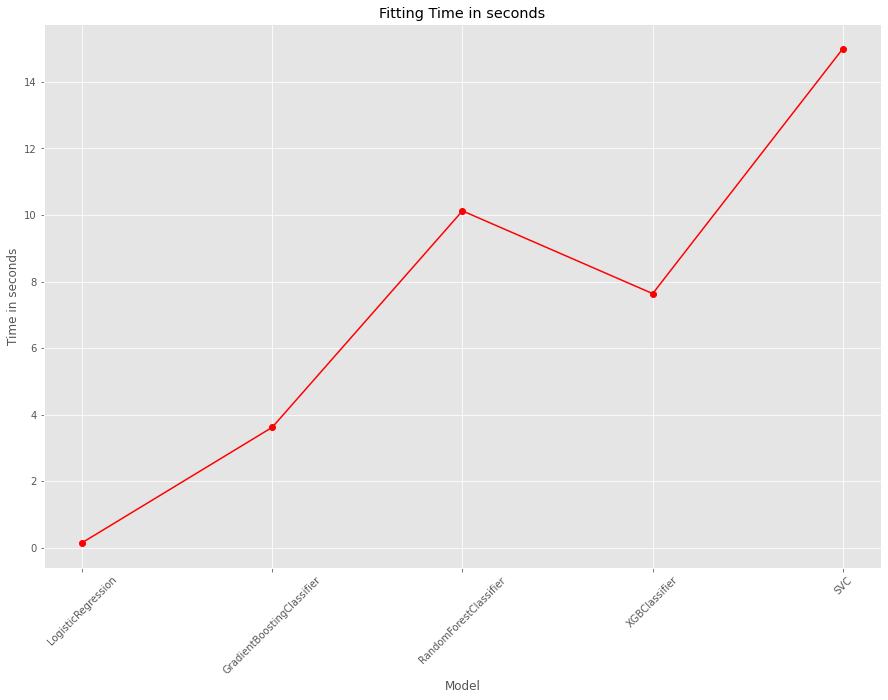

In [55]:
result_line(time_dict)